# Dataset : 2019 flight dataset.csv
# Description: This is a regression machine learning problem
# Label : To Predict the departure delay(Departure_Delay) 


### Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Custom functions

In [9]:
### Missing valus Table
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

In [13]:
# Show Mean, Standatd Deviation
def display_scores(scores):
#     print("Scores:", scores)
    print("Mean :", scores.mean())
    print("Standard deviation:", scores.std())

### Read datset

In [16]:
flights = pd.read_csv("2019 flight dataset.csv",low_memory=False)

In [17]:
flights.head()

,Year,Month,Day,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
0,2019,1,4,5,1/4/2019,OO,20304,OO,N945SW,5657,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2019,1,4,5,1/4/2019,OO,20304,OO,N932SW,5658,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2019,1,4,5,1/4/2019,OO,20304,OO,N932SW,5658,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2019,1,4,5,1/4/2019,OO,20304,OO,N916SW,5659,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2019,1,4,5,1/4/2019,OO,20304,OO,N107SY,5660,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [18]:
flights.filter(['DepDelay', 'DepDelayMinutes'])

,DepDelay,DepDelayMinutes
0,-7.0,0.0
1,-5.0,0.0
2,-6.0,0.0
3,-21.0,0.0
4,-10.0,0.0
5,-10.0,0.0
6,-1.0,0.0
7,8.0,8.0
8,-13.0,0.0
9,-4.0,0.0


In [19]:
flights["Reporting_Airline"].value_counts( sort=False)

OO     64926
DL     73836
WN    111312
UA     46915
NK     15222
F9      9647
EV     13195
HA      6798
YX     25755
9E     20198
AA     77017
YV     18346
MQ     25699
G4      6763
AS     20744
OH     23169
B6     24443
Name: Reporting_Airline, dtype: int64

## Data Preprocessing / Data Cleaning

#### Dataset has,
* 64 classes
* 583985 records

## Columns are

<ol>
<li>Year</li>
<li>Month</li>
<li>Day</li>
<li>DayOfWeek</li>
<li>FlightDate</li>
<li>Reporting_Airline</li>
<li>DOT_ID_Reporting_Airline</li>
<li>IATA_CODE_Reporting_Airline</li>
<li>Tail_Number</li>
<li>Flight_Number_Reporting_Airline</li>
<li>OriginAirportID</li>
<li>OriginAirportSeqID</li>
<li>OriginCityMarketID</li>
<li>Origin</li>
<li>OriginCityName</li>
<li>OriginState</li>
<li>OriginStateFips</li>
<li>OriginStateName</li>
<li>OriginWac</li>
<li>DestAirportID</li>
<li>DestAirportSeqID</li>
<li>DestCityMarketID</li>
<li>Dest</li>
<li>DestCityName</li>
<li>DestState</li>
<li>DestStateFips</li>
<li>DestStateName</li>
<li>DestWac</li>
<li>CRSDepTime</li>
<li>DepTime</li>
<li>DepDelay</li>
<li>DepDelayMinutes</li>
<li>DepDel15</li>
<li>DepartureDelayGroups</li>
<li>DepTimeBlk</li>
<li>TaxiOut</li>
<li>WheelsOff</li>
<li>WheelsOn</li>
<li>TaxiIn</li>
<li>CRSArrTime</li>
<li>ArrTime</li>
<li>ArrDelay</li>
<li>ArrDelayMinutes</li>
<li>ArrDel15</li>
<li>ArrivalDelayGroups</li>
<li>ArrTimeBlk</li>
<li>Cancelled</li>
<li>CancellationCode</li>
<li>Diverted</li>
<li>CRSElapsedTime</li>
<li>ActualElapsedTime</li>
<li>AirTime</li>
<li>Flights</li>
<li>Distance</li>
<li>DistanceGroup</li>
<li>CarrierDelay</li>
<li>WeatherDelay</li>
<li>NASDelay</li>
<li>SecurityDelay</li>
<li>LateAircraftDelay</li>
<li>FirstDepTime</li>
<li>TotalAddGTime</li>
<li>LongestAddGTime</li>
<li>DivAirportLandings</li>
</ol>

### Dataset has
* 49 numerical columns
* 15 categorical columns

In [20]:
flights.describe()

,Year,Month,Day,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
count,583985.0,583985.0,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,583985.000000,...,583985.000000,105222.000000,105222.000000,105222.000000,105222.000000,105222.000000,3962.000000,3962.000000,3962.000000,583985.000000
mean,2019.0,1.0,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,31753.325344,26.850369,...,3.664861,20.106080,4.428551,18.508392,0.079508,24.950590,1278.071933,37.506815,36.776628,0.003935
std,0.0,0.0,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1298.582915,16.506263,...,2.323890,65.762202,38.535323,41.726392,3.203342,50.851973,510.584001,31.837723,30.090092,0.132386
min,2019.0,1.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,30070.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000
25%,2019.0,1.0,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,30721.000000,12.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,824.000000,16.000000,16.000000,0.000000
50%,2019.0,1.0,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,31453.000000,26.000000,...,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1228.000000,29.000000,28.000000,0.000000
75%,2019.0,1.0,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,32467.000000,42.000000,...,5.000000,16.000000,0.000000,21.000000,0.000000,29.000000,1719.000000,46.000000,46.000000,0.000000
max,2019.0,1.0,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,78.000000,...,11.000000,1638.000000,1416.000000,1447.000000,816.000000,1514.000000,2358.000000,297.000000,246.000000,9.000000


### Missing values

In [21]:
missing_zero_values_table(flights)

Your selected dataframe has 64 columns and 583985 Rows.
There are 27 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LongestAddGTime,0,580023,99.3,580023,99.3,float64
TotalAddGTime,0,580023,99.3,580023,99.3,float64
FirstDepTime,0,580023,99.3,580023,99.3,float64
CancellationCode,0,567259,97.1,567259,97.1,object
LateAircraftDelay,53797,478763,82.0,532560,91.2,float64
SecurityDelay,104890,478763,82.0,583653,99.9,float64
NASDelay,43421,478763,82.0,522184,89.4,float64
WeatherDelay,97501,478763,82.0,576264,98.7,float64
CarrierDelay,58078,478763,82.0,536841,91.9,float64
ArrivalDelayGroups,98402,18022,3.1,116424,19.9,float64


### Missing values

##### We can clearly see below columns has more than 80% of missing values so we cannot use or impute them to create the model

* LongestAddGTime
* TotalAddGTime
* FirstDepTime
* CancellationCode
* LateAircraftDelay
* SecurityDelay
* NASDelay
* WeatherDelay
* CarrierDelay

**** We have to remove(clean) those columns

In [22]:
missing_cols = flights.columns[flights.isnull().any()].tolist()

In [23]:
unwanted_cols = ['LongestAddGTime', 'TotalAddGTime', 'FirstDepTime', 'CancellationCode', 'LateAircraftDelay', 'SecurityDelay', 'NASDelay', 'WeatherDelay', 'CarrierDelay']

In [24]:
flights_clean = flights.drop(unwanted_cols, axis=1)

#### There are two non numerical types are in the table 
* CancellationCode	
* Tail_Number

CancellationCode is already removed because of 97.1 % missing values 

#### A tail number refers to an identification number painted on an aircraft, frequently on the tail. 
##### Reference: https://en.wikipedia.org/wiki/Tail_number

Tail number gives only the number of the vehicle and it not gives any details about delay

In [25]:
flights_clean = flights_clean.drop(['Tail_Number'], axis=1)

In [26]:
missing_zero_values_table(flights_clean)

Your selected dataframe has 54 columns and 583985 Rows.
There are 17 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
AirTime,0,18022,3.1,18022,3.1,float64
ActualElapsedTime,0,18022,3.1,18022,3.1,float64
ArrivalDelayGroups,98402,18022,3.1,116424,19.9,float64
ArrDel15,460741,18022,3.1,478763,82.0,float64
ArrDelayMinutes,372769,18022,3.1,390791,66.9,float64
ArrDelay,10430,18022,3.1,28452,4.9,float64
ArrTime,0,17061,2.9,17061,2.9,float64
TaxiIn,0,17061,2.9,17061,2.9,float64
WheelsOn,0,17061,2.9,17061,2.9,float64
WheelsOff,0,16616,2.8,16616,2.8,float64


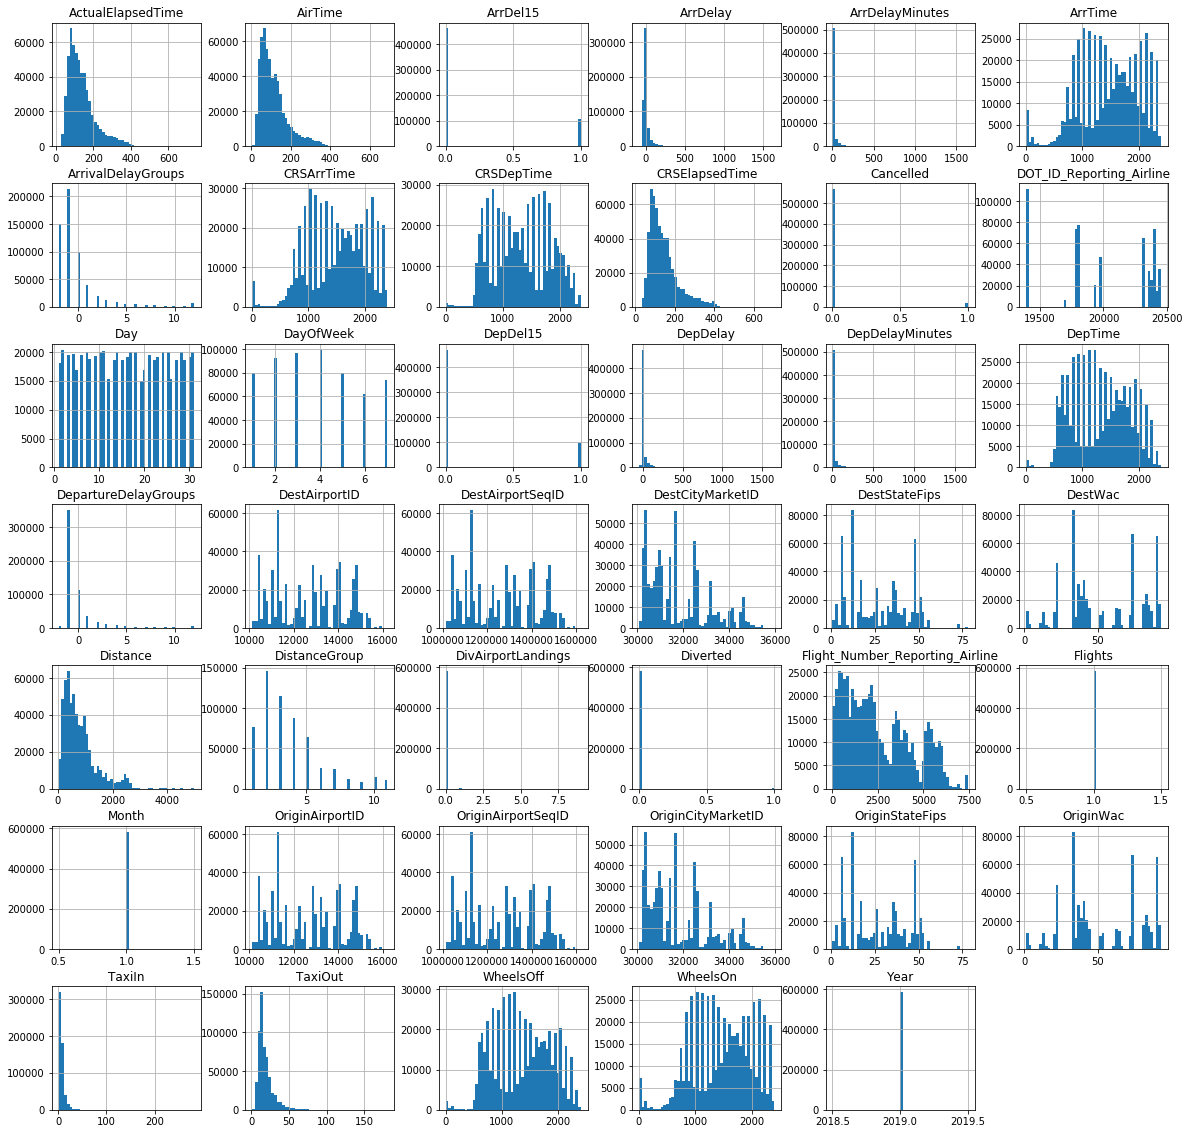

In [27]:
flights_clean.hist(bins=50, figsize=(20,20))
plt.show()

## Date Features
<ol>
<li>Year</li>
<li>Month</li>
<li>Day</li>
<li>DayOfWeek</li>
<li>FlightDate</li>
</ol>

Year, Month, Day and FlightDate gives the same information and most

# Correlation Analysis

In [28]:
corr_matrix = flights_clean.corr()

In [29]:
corr_matrix["DepDelay"].sort_values(ascending=False)

DepDelay                           1.000000
DepDelayMinutes                    0.997019
ArrDelayMinutes                    0.973982
ArrDelay                           0.959519
DepartureDelayGroups               0.848956
ArrivalDelayGroups                 0.791768
DepDel15                           0.576696
ArrDel15                           0.516949
DepTime                            0.117520
WheelsOff                          0.109737
TaxiOut                            0.092145
CRSDepTime                         0.075406
CRSArrTime                         0.070041
DOT_ID_Reporting_Airline           0.049513
Day                                0.039659
Cancelled                          0.030734
Flight_Number_Reporting_Airline    0.028703
WheelsOn                           0.025837
ActualElapsedTime                  0.024121
Diverted                           0.020569
TaxiIn                             0.020234
ArrTime                            0.018329
CRSElapsedTime                  

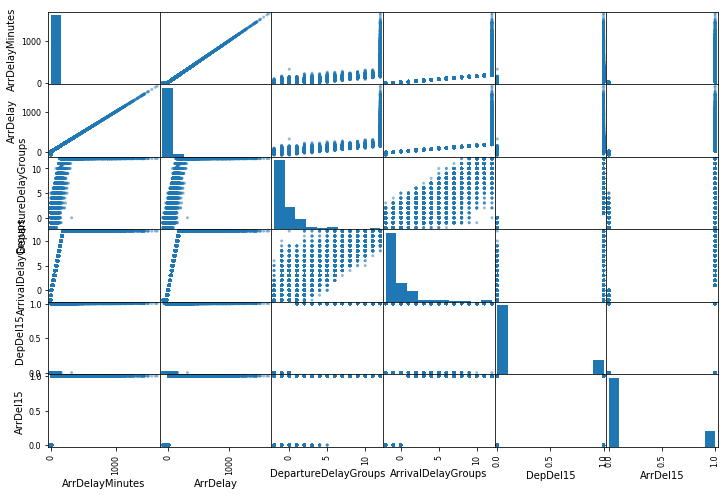

In [30]:
attributes = ['ArrDelayMinutes', 'ArrDelay', 'DepartureDelayGroups','ArrivalDelayGroups', 'DepDel15',  'ArrDel15']
scatter_matrix(flights_clean[attributes], figsize=(12, 8))
plt.show()

## Best Correlated feaures 

* ArrDelayMinutes           
* ArrDelay                  
* DepartureDelayGroups      
* ArrivalDelayGroups        
* DepDel15                  
* ArrDel15 

In [31]:
clean_cols = ['ArrDelayMinutes', 'ArrDelay', 'DepartureDelayGroups',
              'ArrivalDelayGroups', 'DepDel15',  'ArrDel15', 'DepDelay']


In [32]:
flights_cleaned = flights_clean.filter(clean_cols, axis=1)

## Correlation HeatMap

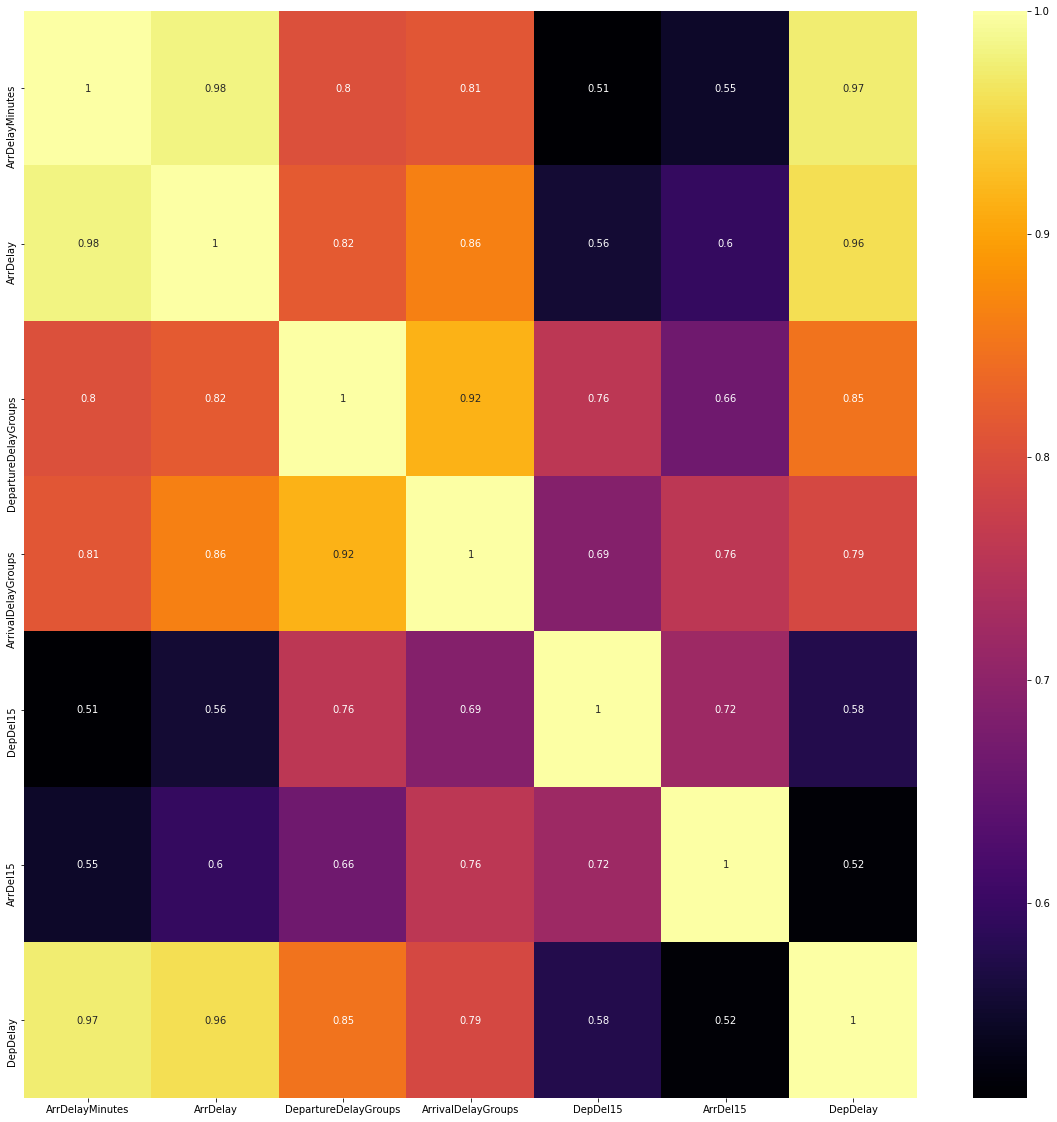

In [33]:
corrMatrix = flights_cleaned.corr()
fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(corrMatrix, annot=True, cmap='inferno')
plt.show()

## Imputing missing values

In [34]:
imputer = SimpleImputer(strategy="most_frequent")

In [35]:
cols = flights_cleaned.columns

In [36]:
imputer.fit(flights_cleaned)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [37]:
flights_ = imputer.transform(flights_cleaned)
flights_tr = pd.DataFrame(flights_, columns=cols)

In [38]:
flights_tr.head()

,ArrDelayMinutes,ArrDelay,DepartureDelayGroups,ArrivalDelayGroups,DepDel15,ArrDel15,DepDelay
0,0.0,-26.0,-1.0,-2.0,0.0,0.0,-7.0
1,1.0,1.0,-1.0,0.0,0.0,0.0,-5.0
2,0.0,-17.0,-1.0,-2.0,0.0,0.0,-6.0
3,0.0,-29.0,-2.0,-2.0,0.0,0.0,-21.0
4,0.0,-31.0,-1.0,-2.0,0.0,0.0,-10.0


In [39]:
X = flights_tr.drop('DepDelay', axis=1)
y = flights_tr['DepDelay']

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X=X)

In [41]:
X_scaled =  pd.DataFrame(X_scaled, columns=X.columns)

## Train and Test Split

* 80% for train 
* 20% for test

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [43]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split( X_scaled, y, test_size=0.33, random_state=42)

## Training and Validation

In [44]:
# Show MAE, MSE, RMSE, Mean, STD

def results(reg, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, X=X, y=y ):
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    scores = cross_val_score(reg, X, y, scoring="neg_mean_squared_error", cv=10)
    
    print("MSE  : ", mse)
    print("RMSE :", rmse)
    print("MAE  :", mae)
    
    display_scores(scores)

### Linear Regression

In [46]:
lin_reg = LinearRegression()
results(lin_reg)

MSE  :  41.06336049028938
RMSE : 6.408069950483482
MAE  : 4.262177552892014
Mean : -43.33374360784988
Standard deviation: 11.44692639891666


### Decision Tree Regression

In [45]:
dec_reg = DecisionTreeRegressor()
results(dec_reg)

MSE  :  21.087834716703068
RMSE : 4.592149248086681
MAE  : 2.929428651460476
Mean : -22.65141346371404
Standard deviation: 7.214835185733769


### Random Forest Regression

In [275]:
ran_reg = RandomForestRegressor()
results(ran_reg)

MSE  :  20.788012923299657
RMSE : 6.408069950483482
MAE  : 2.9253668991963977
Mean : -22.392852456106283
Standard deviation: 7.020830739370741


### Support Vector Regression

In [1]:
# svm_reg = SVR()
# results(svm_reg)